In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
articles = pd.read_csv('./data/articles.csv')

In [6]:
selectors = [col for col in articles.columns if not any(['code' in col, 'no' in col, 'id' in col])] + ['article_id']
selectors = [s for s in selectors if s != 'detail_desc']

In [7]:
articles = articles.loc[:, selectors]

In [9]:
articles.head()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,article_id
0,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775015
1,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775044
2,20 den 1p Stockings,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,111565001
3,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,111586001
4,Support 40 den 1p Tights,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,111593001


In [11]:
article_ids = articles['article_id'].to_numpy()
article_ids

array([108775015, 108775044, 111565001, ..., 882888002, 883033002,
       918292001])

In [110]:
keyword_cols = [s for s in selectors if s != 'prod_name' and s != 'article_id']

def generate_keywords(article, keyword_cols):
    special_chars = {'&', 'and', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0'}
    transform_lowercase = lambda x: x.lower()
    remove_slashes = lambda x: ' '.join(x.split('/')) if '/' in x else x
    remove_comma = lambda x: x.replace(',', '')
    remove_plus = lambda x: x.replace('+', '')
    remove_minus = lambda x: x.replace('-', '')
    keyword_list = ' '.join(
                            map(remove_minus,
                                map(remove_plus, 
                                    map(remove_comma, 
                                        map(remove_slashes, 
                                            map(transform_lowercase, 
                                                    article[keyword_cols])
                                            )
                                        )
                                    )
                                )
                            ).split(' ')
    unique_keywords = list(set(keyword_list) - special_chars)
    return ' '.join(unique_keywords)

articles['keywords'] = articles.apply(lambda item: generate_keywords(item, keyword_cols), axis=1)

articles_kw = articles[['article_id', 'keywords', 'prod_name']]


In [111]:
articles_kw

,article_id,keywords,prod_name
0,108775015,solid everyday basics black top upper vest jer...,Strap top
1,108775044,solid everyday basics top upper vest jersey ba...,Strap top
2,111565001,solid lingeries black nightwear socks tights b...,20 den 1p Stockings
3,111586001,solid lingeries black nightwear leggings tight...,Shape Up 30 den 1p Tights
4,111593001,solid lingeries black nightwear socks tights b...,Support 40 den 1p Tights
...,...,...,...
996,879248001,solid everyday basics black shorts jersey basi...,Glamping
997,880839001,solid basics black full divided jersey basic d...,Eleonor button dress
998,882888002,stripe everyday beige jersey fancy trousers du...,Agneta jumpsuit
999,883033002,everyday other full jersey fancy collection ga...,CS Paula dress


In [77]:
articles_kw['keywords'].to_numpy()

array(['solid everyday basics black top upper vest jersey basic garment ladieswear body womens dark',
       'solid everyday basics top upper vest jersey basic garment white light ladieswear body womens',
       'solid lingeries black nightwear socks tights basic underwear ladieswear womens tigh dark',
       ...,
       'stripe everyday beige jersey fancy trousers dusty collection garment light lower ladieswear body womens',
       'everyday other full jersey fancy collection garment white dress structure light ladieswear body womens',
       'bottoms black leggings h&m tights sport jersey fancy ladies lower melange body garment dark'],
      dtype=object)

In [113]:
article_kw_inputs = tf.keras.Input(shape=(1,))
lookup = tf.keras.layers.TextVectorization(standardize=None, output_sequence_length=20)
lookup.adapt(articles_kw['keywords'].to_numpy())

model_1 = tf.keras.Model(article_kw_inputs, lookup(article_kw_inputs))
model_1.compile()

In [114]:
keyword_texts = articles_kw['keywords'].astype('str').to_numpy()
keyword_texts = keyword_texts.reshape(keyword_texts.shape[0], 1)

model_1.predict(keyword_texts)


2022-04-08 13:34:48.710987: W tensorflow/core/framework/op_kernel.cc:1722] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node 'model_9/Cast' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/bswaika/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/bswaika/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/bswaika/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/bswaika/.local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/bswaika/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "/home/bswaika/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "/home/bswaika/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
      await result
    File "/home/bswaika/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "/home/bswaika/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/bswaika/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/home/bswaika/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "/home/bswaika/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "/home/bswaika/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/home/bswaika/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/bswaika/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/home/bswaika/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_2117/3794389389.py", line 4, in <module>
      model_1.predict(keyword_texts)
    File "/home/bswaika/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/bswaika/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1982, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/bswaika/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1801, in predict_function
      return step_function(self, iterator)
    File "/home/bswaika/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/bswaika/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1783, in run_step
      outputs = model.predict_step(data)
    File "/home/bswaika/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1751, in predict_step
      return self(x, training=False)
    File "/home/bswaika/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/bswaika/.local/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/bswaika/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/bswaika/.local/lib/python3.8/site-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/home/bswaika/.local/lib/python3.8/site-packages/keras/engine/functional.py", line 571, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "/home/bswaika/.local/lib/python3.8/site-packages/keras/engine/functional.py", line 671, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'model_9/Cast'
2 root error(s) found.
  (0) UNIMPLEMENTED:  Cast string to float is not supported
	 [[{{node model_9/Cast}}]]
  (1) CANCELLED:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_predict_function_5563]

array([['solid everyday basics black top upper vest jersey basic garment ladieswear body womens dark'],
       ['solid everyday basics top upper vest jersey basic garment white light ladieswear body womens'],
       ['solid lingeries black nightwear socks tights basic underwear ladieswear womens tigh dark'],
       ...,
       ['stripe everyday beige jersey fancy trousers dusty collection garment light lower ladieswear body womens'],
       ['everyday other full jersey fancy collection garment white dress structure light ladieswear body womens'],
       ['bottoms black leggings h&m tights sport jersey fancy ladies lower melange body garment dark']],
      dtype=object)

In [13]:
article_id_inputs = tf.keras.Input(shape=(1,))
lookup = tf.keras.layers.IntegerLookup()
lookup.adapt(article_ids)
embed = tf.keras.layers.Embedding(len(lookup.get_vocabulary()), 2)

x = lookup(article_id_inputs)
x = embed(x)

embedding_model = tf.keras.Model(article_id_inputs, x)


In [45]:
embedding_model.compile(loss=tf.keras.losses.CosineSimilarity(), optimizer=tf.keras.optimizers.Adam())

In [46]:
preds = embedding_model.predict(article_ids)

In [47]:
import matplotlib.pyplot as plt
import numpy as np

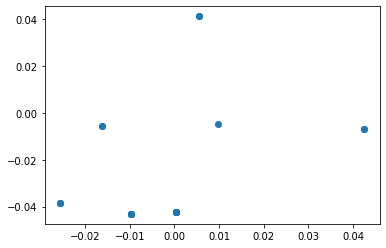

In [48]:
x = preds[:, 0, 0]
y = preds[:, 0, 1]

plt.scatter(x, y)
plt.show()